# Exercise 2

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy

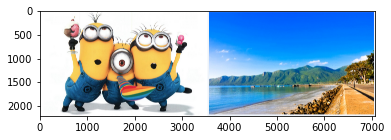

In [3]:
I = cv2.imread('foreground.png')
J = cv2.imread('background.png')
J_resize = cv2.resize(J, (I.shape[1], I.shape[0]))
res = np.concatenate((I, J_resize), axis = 1)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [4]:
def calcHist(mat):
    hist = np.zeros(256)
    for x in range(mat.shape[0]):
        for y in range(mat.shape[1]):
            hist[mat[x][y]] += 1
    return hist

In [5]:
hist_B = calcHist(I[:,:,0])
hist_G = calcHist(I[:,:,1])
hist_R = calcHist(I[:,:,2])

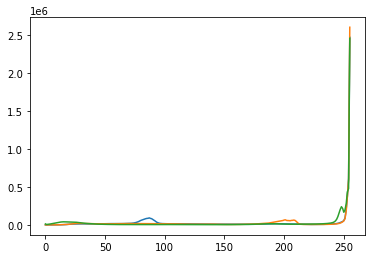

In [6]:
squeeze_B = np.squeeze(hist_B)
plt.plot(squeeze_B)
squeeze_G = np.squeeze(hist_G)
plt.plot(squeeze_G)
squeeze_R = np.squeeze(hist_R)
plt.plot(squeeze_R)
plt.show()

In [7]:
def CombineImages(foreground, background):
    k = 120
    T = np.zeros(foreground.shape)
    T = foreground > k
    M = np.zeros(foreground.shape)
    M = T[:,:,0] * T[:,:,1] * T[:,:,2]
    N = np.logical_not(M)
    K = np.zeros(foreground.shape)
    for b in range(foreground.shape[2]):
        K[:,:,b] = M * background[:,:,b] + N * foreground[:,:,b]
    return K.astype(np.uint8)

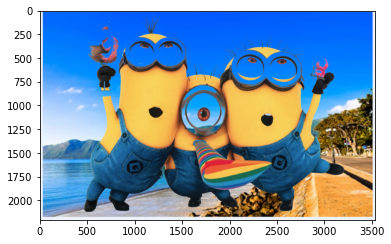

In [8]:
res = CombineImages(I, J_resize)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(res)

# Exercise 1

In [33]:
img = cv2.imread('GreenVietnam.png')

In [39]:
def convolution(src, kernel):
    
    res = np.zeros(src.shape)
    
    G = ((kernel.shape[0]-1) // 2, (kernel.shape[1]-1) // 2)
    
    #add padding
    src_padding = np.zeros((src.shape[0] + G[0]*2, src.shape[1] + G[1]*2, src.shape[2])).astype(np.uint8)
    src_padding[G[0]:src.shape[0]+G[0], G[1]:src.shape[1]+G[1], :] = src
    
    #flip kenel
    kernel = np.flip(kernel, 1)
    kernel = np.flip(kernel, 0)
    
    #convolution
    for r in range(G[0],src.shape[0] - G[0]):
        for c in range(G[1],src.shape[1] - G[1]):
            for b in range(3):
                res[r,c,b] = np.sum(src_padding[r - G[0] : r + G[0] + 1, c - G[0]:c + G[0] + 1, b] * kernel)

    res[res >= 255] = 255
    return res
    

kenel = np.array([[1, -1, 0], [-1, 5, -1], [0, -1, 0]])
resimg = convolution(img, kenel)

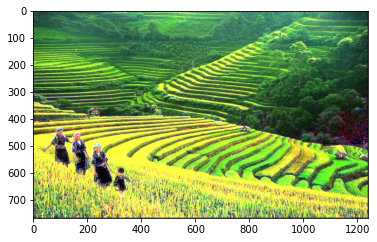

In [40]:
plt.imshow(cv2.cvtColor(resimg.astype(np.uint8), cv2.COLOR_BGR2RGB))

In [41]:
resimg += img
resimg[resimg > 255] = 255

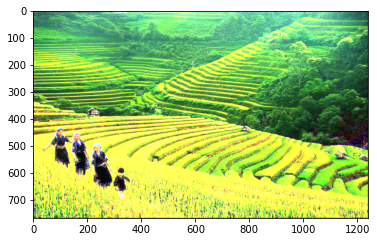

In [42]:
plt.imshow(cv2.cvtColor(resimg.astype(np.uint8), cv2.COLOR_BGR2RGB))